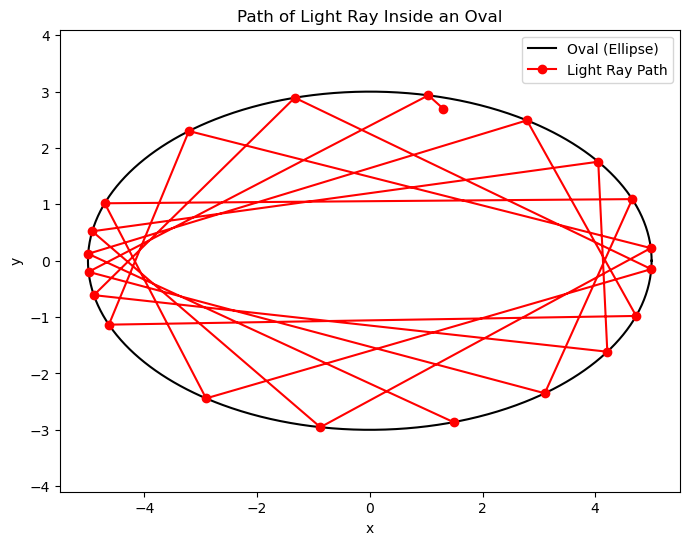

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ellipse parameters
a = 5  # Semi-major axis
b = 3  # Semi-minor axis

# Function to compute the normal vector at a point on the ellipse
def normal_vector(x, y):
    dx = 2 * x / a**2
    dy = 2 * y / b**2
    norm = np.sqrt(dx**2 + dy**2)
    return np.array([dx / norm, dy / norm])

# Function to calculate the reflection
def reflect(ray_dir, normal):
    dot_product = np.dot(ray_dir, normal)
    return ray_dir - 2 * dot_product * normal

# Function to find the next intersection of the ray with the ellipse
def find_intersection(pos, direction):
    x, y = pos
    dx, dy = direction
    
    # Solve for t in the ellipse equation with parametric ray equation
    A = (dx / a)**2 + (dy / b)**2
    B = 2 * (x * dx / a**2 + y * dy / b**2)
    C = (x / a)**2 + (y / b)**2 - 1
    
    # Quadratic formula
    discriminant = B**2 - 4 * A * C
    if discriminant < 0:
        return None  # No intersection
    
    t1 = (-B - np.sqrt(discriminant)) / (2 * A)
    t2 = (-B + np.sqrt(discriminant)) / (2 * A)
    
    # Take the smallest positive t (next intersection point)
    t = t1 if t1 > 1e-8 else t2  # Avoid current position (t > 0)
    if t < 1e-8:
        return None
    
    # Compute intersection point
    intersection = pos + t * direction
    return intersection

# Initial ray position and direction
initial_pos = np.array([1.3, 2.7])  # Starting point inside the ellipse
initial_dir = np.array([-1.0, 0.9])  # Initial direction (normalized)
initial_dir /= np.linalg.norm(initial_dir)

# Parameters for the simulation
num_reflections = 20

# Lists to store the path
x_points = [initial_pos[0]]
y_points = [initial_pos[1]]

# Simulate the path of the light ray
pos = initial_pos
direction = initial_dir
for _ in range(num_reflections):
    # Find the next intersection point
    next_pos = find_intersection(pos, direction)
    if next_pos is None:
        break  # Stop if no more intersections
    # Compute the normal at the intersection point
    normal = normal_vector(next_pos[0], next_pos[1])
    # Reflect the ray
    direction = reflect(direction, normal)
    # Update the position and store it
    pos = next_pos
    x_points.append(pos[0])
    y_points.append(pos[1])

# Plot the results
theta = np.linspace(0, 2 * np.pi, 1000)
ellipse_x = a * np.cos(theta)
ellipse_y = b * np.sin(theta)

plt.figure(figsize=(8, 6))
plt.plot(ellipse_x, ellipse_y, label="Oval (Ellipse)", color="black")
plt.plot(x_points, y_points, label="Light Ray Path", marker='o', color="red")
plt.axis('equal')
plt.title("Path of Light Ray Inside an Oval")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
